# Binäre Klassifikation - Erste Modelle


## Ein Modell bauen

Wie sieht der Ablauf beim Maschinellen Lernen aus, um ein Modell
aufzubauen? Der erste grobe Ablauf orientiert sich an dem von Acquviva [Acq2023]
beschriebenen Ablauf. Es besteht aus verschiedenen Schritten, die
sukzessive durchgearbeitet werden. Später, am Ende vom Kapitel 
zur Bewertung von Binären Klassifikationen,
wird ein verfeinerter Ablauf vorgestellt,

**Schritt 1: vorbereiten / prepare**

**Daten aufbereiten**: Die Daten, die verwendet werden müssen oftmals
aufbereitet werden. Auch der Umgang mit fehlenden Daten muss geklärt
werden. Die Daten werden dabei oftmals als ein `pandas`-Datenframe
bereitgestellt. Hier wird jedoch das Werkzeug `pandas` nicht genauer
betrachtet. Die Daten werden als ein `numpy`-array aufgebaut, wobei die
Daten bereinigt sind. Wenn die Daten als `pandas`-Datenframe kommen,
dann werden sie für die weitere Bearbeitung meistens in ein
`numpy`-array umgewandelt.

**splitten**: Die Daten werden aufgeteilt in Trainingsdaten und
Testdaten. Damit stehen am Ende dieses Schritten die Trainingsdaten
$X_{train}$, $\textbf{y}_{train}$ und die Testdaten $X_{test}$,
$\textbf{y}_{test}$ zur Verfügung.

**Schritt 2: auswählen / select**

In diesem Schritt wird der Algorithmus / das Modell gewählt, der für das
Training angewendet werden soll. Dabei werden auch die Parameter für den
Algorithmus festgelegt.

Beispiel: Soll ein Polynom bestimmt werden, dann ist festzulegen,
welchen Grad das Polynom haben soll. Der Grad des Polynoms ist dann ein
**Hyperparameter**. Die noch unbekannten Koeffizienten des Polynoms die
**Parameter**, die bestimmt werden sollen.

Es gibt sehr viele ML Algorithmen, die gewählt werden können. Es können
hier nur einige wenige vorgestellt werden. Grundlegende Begriffe, wie
Trainingsdaten, Testdaten, Fehlerrate, Erfolgsrate und weitere Begriffe,
die im folgenden noch besprochen werden sind jedoch für alle gleich.

**Hinweis:** Auch die Bestimmung der geeigneten Hyperparameter ist ein
aufwändiger Lernprozess. Es gibt teilweise sehr viele verschiedene
Einstellungen für die einzelnen Algorithmen, Variiert man die
Hyperparameter, dann ergeben sich andere Funktionen, mit anderen
Bewertungen. Auch die Hyperparameter können mit Hilfe ML bestimmt
werden.

**Schritt 3: trainieren / train** Der ausgewählte Algorithmus wird auf
die Trainingsdaten angewendet. Das Training des Modells wird
durchgeführt (*fit*). Dies generiert dann eine vorläufige Beziehung
zwischen den Input- und Outputdaten. Damit wird also der Zusammenhang,
gemäß dem gewählten Algorithmus beschrieben. Dies ist in der Regel ein
sehr rechenintensiver Vorgang.

**Schritt 4: anwenden / apply** Das trainierte Modell, wird auf die
Testdaten angewendet (*predict*). Aus den Inputdaten der Testdaten
werden Vorhersagen für die Output-Daten $\hat{\textbf{y}}_{test}$
erstellt. Das sind die Vorhersagewerte auf Basis des trainierten
Modells.

**Schritt 5: bewerten / evaluate** Auf Basis eines vorab bestimmten
**Bewertungsmaßstab**es wird die Perfomance des Modells auf die Daten
ermittelt. Hierzu findet ein Vergleich der Vorhersagewerte
$\hat{\textbf{y}}_{test}$ mit den echten Werten $\textbf{y}_{test}$
statt. Aus den Differenzen wird eine Bewertung erstellt.

**Schritt 6: analysieren / analyse** Es kann sein, dass das erzielte
Ergebnis gut ist - das ist jedoch in der Regel unwahrscheinlich. Oftmals
muss man überlegen, was verbessert werden kann oder muss. Sollen ein
anderer Algorithmus verwendet werden, die Hyperparameter für den
Algorithmus anders gewählt werden, werden mehr Daten benötigt, was
funktioniert nicht so gut, was muss besser gestaltet werden. Daraufhin
kann der ML Algorithmus geändert oder verändert werden und der Ablauf
wiederholt sich.

Im den nachfolgenden Abschnitten werden zwei Algorithmen für eine **binäre 
Klassifikation** vorgestellt und an einem einfachen Beispiel durchgearbeitet. 
Eine Binäre Klassifikation ist eine oftmals wiederkehrende Aufgabe.

Beispiele hierfür:
- Ist in einem Bild ein Hund zu sehen oder nicht.
- Ist eine Person kreditwürdig oder nicht.
- Trennung bei physikalischen Experimenten zwischen Signal (*signal*) und Untergrund (*background*)
- Ist ein Planet potenziell bewohnbar (*habitable*) oder nicht.

Die letzte Fragestellung wird hier etwas untersucht, so wie es auch bei Acquaviva [Acq2023] durchgeführt wird.
Dazu werden zuerst die Daten, die für die Untersuchung herangezogen werden betrachtet, um mit den Daten vertrauter zu werden.
Anschließend wird der Algorithmus **Entscheidungsbaum** (*Decision Tree*, DT) vorgestellt. 
Danach wird der Algorithmus **k-Nächster Nachbar** (*k-Nearest Neighbor*) vorgestellt.

In [1]:
# --- imports
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

## Binäre Klassifikation - Entscheidungsbaum (DT)

### Problemstellung und Daten
Daten sind die Basis für die Arbeit im Data Science. Acquavia schreibt dazu 
(siehe [Acq2023], Abschnitt 2.1) als von ihr aufgestellte *goldene Regel*: 
"*know your data*"!
Daher ist es wichtig, die Daten zu betrachten. Dabei sollen mindestens die nachfolgenden Dinge unternommen werden:
- Den Umfang der Daten prüfen, die Anzahl der Instanzen und die Anzahl der Eigenschaften. Gibt es ausreichend viele Datensätze für die Bearbeitung?
- Überprüfen, ob die Daten vollständig sind oder ob es in den Datensätzen fehlende Daten gibt. Wie wird mit fehlenden Daten umgegangen?
- Müssen die Daten eventuell normalisiert werden? Gibt es merkwürdige Verteilungen der Daten? Wie wird mit Ausreißern (*outlier*) der Daten umgegangen?
- Sind bei einem Klassifizierungsproblem in allen Klassen ausreichend viele Daten vorhanden? 

Daher ist es nicht ratsam, die Algorithmene einfach nur anzuwenden, ohne dass die Daten verstanden werden. 
Die Ergebnisse der Analyse müssen geprüft und interpretiert werden. 
Es ist zu prüfen, ob das Ergebnis mit der Intuition übereinstimmt. Wenn nicht, dann ist zu klären, woher die Diskrepanz herrührt.

### Habitable Planeten
Acuavia wählt als erstes Beispiel einen Datensatz von 18 Planeten, bei denen verschiedene Merkmale bekannt sind.
Es ergibt sich die Frage, ob sie bewohnbar (*habitable*) sind oder nicht. 
Die Daten sind von der Quelle https://phl.upr.edu/hwc, in der inzwischen einige Tausende Planeten aufgeführt sind. 
Es sind 18 Planeten aus dieser Liste ausgewählt. Diese Beispiele werden auch im Nachfolgenden betrachtet und untersucht. 
Dabei werden verschiedene 
Modelle angewendet und verschiedene Sachverhalte erläutert und beispielhaft demonstriert.

Die Beispieldaten beinhalten die folgenden Merkmale (*feature*) und Ziele (*target*):
- `P_NAME`: Name des Exoplanten: Dies ist nur für die Identifikation notwendig.
- `S_MASS`: Masse des Elternsterns (*stellar mass*), um den der Planet kreist, ausgedrückt in Sonnenmassen.
- `P_PERIOD`: Umlaufdauer (*orbital period*) des Planeten um den Elternstern in Tagen. 
- `P_DISTANCE`: Distanz (distance) des Planeten von Stern in Astronomischen Einheiten (AU).
- `P_HABITABLE`: Bewohnbar (*habitable*)? Eine Einschätzung, ob der Planet bewohnbar ist (1 = bewohnbar, 0 = nicht bewohnbar).

Hinweis: In der Quelle der Daten ist die Eigenschaft bewohnbar noch weiter differenziert. Darauf wird hier nicht genauer eingegangen. 
Wenn mit dem großen Datensatz aus der Quelle gearbeitet wird, dann ist zu klären, wie damit umgegangen wird. 
Daher ist es wichtig, die Daten zu kennen und vor der Auswertung zu betrachten.

In [2]:
# --- read the data
import pandas as pd
filename = 'HabitablePlanets_LearningSet.csv'
df_learning_set = pd.read_csv (filename, sep=',')
df_learning_set \
    = df_learning_set.drop (df_learning_set.columns [0], axis=1) 
print (df_learning_set)
learning_set \
    = df_learning_set.drop (df_learning_set.columns [0], axis=1).to_numpy ()

                P_NAME  S_MASS     P_PERIOD  P_DISTANCE  P_HABITABLE
0         Kepler-736 b    0.86     3.601472    0.043718            0
1         Kepler-636 b    0.85    16.080661    0.118082            0
2         Kepler-887 c    1.19     7.638460    0.080420            0
3         Kepler-442 b    0.61   112.305300    0.409327            1
4         Kepler-772 b    0.98    12.992073    0.107408            0
5   Teegarden's Star b    0.09     4.910000    0.025200            1
6             K2-116 b    0.69     4.655411    0.048086            0
7            GJ 1061 c    0.12     6.689000    0.035000            1
8           HD 68402 b    1.12  1103.000000    2.180981            0
9        Kepler-1544 b    0.81   168.811170    0.557107            1
10        Kepler-296 e    0.50    34.142110    0.178202            1
11        Kepler-705 b    0.53    56.056054    0.231926            1
12        Kepler-445 c    0.18     4.871229    0.031746            0
13         HD 104067 b    0.62    

Die Daten stehen nun als `numpy`-Array zur Verfügung.
Es ist ein $18 \times 4$-Array mit numerischen Werten.
Die Namen der Sterne sind nicht mehr in den Daten enthalten.

Bei der Betrachtung der Daten fällt auf, dass der Plant mit der Nummer 8 (HD 68402 b) ein Ausreißer ist.
Die Periodendauer und der Abstand zum Elternstern ist deutlicher größer als bei den anderen Planent.
In Anbetracht der Kepler'schen Planentengesetz ist das jedoch nicht unwahrscheinlich.

Es gibt bei den Beispielen acht bewohnbare Planeten und zehn unbewohnbare Planeten. 
Damit ist der Datensatz bezüglich der Eigenschaft bewohnbar ausgeglichen.
Im großen Datensatz ist der Anteil der bewohnbaren Planeten deutlich geringer.

Eine wichtige Eigenschaft für die Frage, ob ein Planet bewohnbar ist oder nicht, ist die Temperatur auf der Oberfläche.
Diese Eigenschaft ist nicht im Datensatz direkt enthalten. 
Über die Eigenschaften Sternenmasse und Distanz ist die Temperatur jedoch indirekt berücksichtigt, 
denn Sternenmasse und Distanz sind wichtige Parameter, welche die Temperatur stark beeinflussen.

### Aufspaltung in Trainings- und Testdaten
Gemäß den Ausführungen bei Acquaviva werden zunächst die ersten 13 Planeten (also die Nummern 0 bis 12) als Trainingsdaten (*training set*) 
und die letzten fünf Planeten (Nummern 13 bis 17) als Testdaten (*test set*) verwendet. 
Später wird die Aufteilung verändert.

Die Daten haben drei Input-Daten.
- 1. Spalte: Masse des Elternsterns in Sonnenmassen (`S_MASS`), 
- 2. Spalte: Dauer eines Umlaufes in Tagen (`P_PERIOD`) und 
- 3. Spalte: Entfernung des Planeten vom Elternstern in Astronomischen Einheiten (AU) (`P_DISTANCE`).

und eine Output-Spalte
- 4. Spalte: Kennzeichen ob habitable (1) oder nicht (0).

Da eine 3-dimensionale Darstellung schwierig ist, werden im nachfolgenden nur zwei der Eigenschaften zur grafischen Darstellung und zur Bearbeitung verwendet: 
Sternenmasse (`S_MASS`) und Umlaufdauer (`P_PERIOD`).

In [3]:
# --- split into training set / test set
# - select columns for training
pattern_2D = [True, True, False, True] 

training_set = learning_set [:13, pattern_2D]
test_set = learning_set [13:, pattern_2D]

# --- split in features and label
X_train = training_set [:, :2]
X_test = test_set [:, :2]
# - convert y_train, y_test to a column vector
y_train = training_set [:, 2].reshape (-1, 1)
y_test = test_set [:, 2].reshape (-1, 1)

Die Daten werden grafisch dargestellt. Da die Werte auf der $y$-Achse sehr weit gestreut sind, wird eine logarithmische Skalierung gewählt.

Es sind zwei Linien eingezeichnet, die später genauer erläutert werden.

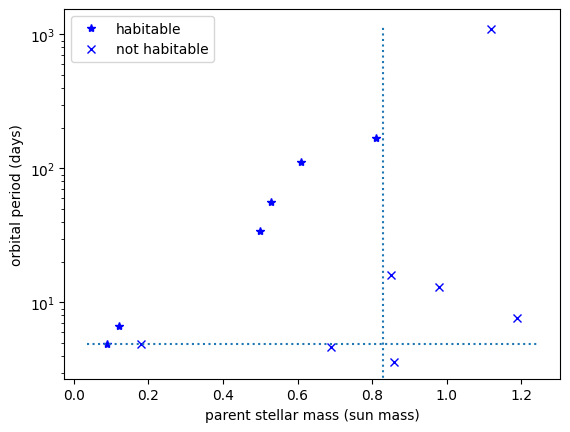

In [4]:
# --- select habitable / not habitable
pattern_train_habitable \
    = np.where (y_train == 1, True, False).transpose () [0]
pattern_train_not_habitable \
    = np.where (y_train == 0, True, False).transpose () [0]

X_train_habitable = X_train [pattern_train_habitable]
X_train_not_habitable = X_train [pattern_train_not_habitable]
y_train_habitable = y_train [pattern_train_habitable]
y_train_not_habitable = y_train [pattern_train_not_habitable]

plt.plot (X_train_habitable [:,0], X_train_habitable [:,1], \
          'b*', label = 'habitable')
plt.plot (X_train_not_habitable [:,0], X_train_not_habitable [:,1], \
          'bx', label = 'not habitable')
xmin, xmax = plt.xlim ()
plt.hlines (4.93, xmin, xmax,linestyles = 'dotted')
ymin, ymax = plt.ylim ()
plt.vlines (0.83, ymin, ymax,linestyles = 'dotted')
plt.xlabel ('parent stellar mass (sun mass)')
plt.ylabel ('orbital period (days)')
plt.yscale ("log")
plt.legend ()
plt.show ()

### Algorithmus: Entscheidungsbaum (*Decision Tree*, DT) - per Hand
Bei einem Entscheidungsbaum werden an Hand eines Kriteriums Schnitte durchgeführt. Dadurch wird der Bereich in zwei Teile zerlegt.
Es ergibt sich die Frage, wo der Schnitt geeignet gewählt werden kann. Ziel ist es, dass am Schluss reine Bereiche entstehen,
bei der in jedem Bereich nur eine Klasse vertreten ist. In den einzelnen Bereichen soll es am Ende keine Vermischung geben.

Zur Bemessung der Vermischung von Daten wird oftmals der **Gini Unreinheit** (*Gini impurity*) herangezogen.

Der Wert *Gini Unreinheit* ist nach dem italienischen Statistiker Corrado Gini (https://de.wikipedia.org/wiki/Corrado_Gini) benannt.
Der Wert darf nicht mit dem Gini-Koeffizienten verwechselt werden!

Die Gini Unreiheit (hier kurz Gini) wird für jeden Bereich folgendermaßen berechnet.
Für jede Klasse $i$ sei $n(i)$ die Anzahl der Elemente der Klasse im Bereich. 
Somit ist $N = \sum_i n(i)$ die Gesamtanzahl der Objekte im Bereich.
Dann sei $f(i) = n(i) / N$ der Anteil der Elemente der Klasse $i$ in der Gesamtmenge.
Die Gini Unreinheit ist dann gegeben durch
$$ Gini = 1 - \sum_i f(i)^2 $$
In einer Menge mit zwei Klassen ist der Wert zwischen $0.0$ und $0.5$. Bei einem Wert von $0.0$ oder $1.0$ besteht die Menge nur aus Elementen einer Klasse.
Bei einem Wert von $0.5$ ist die Menge maximal durchmischt

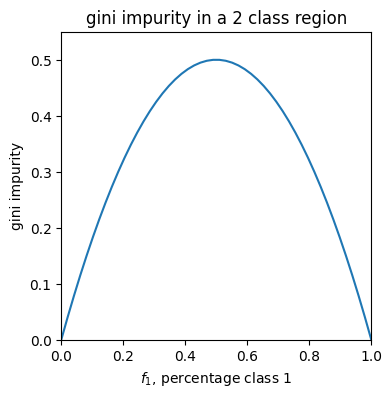

In [5]:
# --- calculate gini impurity for 2 classes
def gini (n1, n2):
    n = n1 + n2
    return 1 - (n1 / n) **2 - (n2 / n) ** 2

# --- plot gini for a 2-class-example
n1 = np.linspace (0.0, 1.0, 50)
n2 = 1.0 - n1
plt.figure (figsize=(4,4)) 
plt.plot (n1, gini (n1, n2))
plt.xlim ([0.0, 1.0])
plt.xlabel ("$f_1$, percentage class 1")
plt.ylim ([0.0, 0.55])
plt.ylabel ("gini impurity")
plt.title ("gini impurity in a 2 class region")
plt.show ()

In den Trainingsdaten sind insgesamt 13 Daten enthalten. Sieben habitable Planeten und sechs nicht habitable Planeten. 
Für die gegebene Trainingsmenge ist $Gini = 1 - (7/13)^2 - (6/13)^2 = 0.497$

Wenn die Trainingsdaten betrachtet werden, dann gibt es zwei Schnitte, welche die Menge so spalten, so dass ein Teilbereich
rein ist. 
- ist die Sternenmasse größer als $0.83$ (Sonnenmassen), dann sind alle Planenten nicht habitabel
- ist die Periodendauer kleiner als $4.93$ (Tage), dann sind alle Planenten nicht habitabel

Beide Linien sind in der obigen Zeichnung eingetragen. Welcher Schnitt sollte zuerst durchgeführt werden?

Wird der Schnitt bezüglich der Periodendauer durchgeführt. Dann sind im oberen Bereich 6 habitable und 4 nicht-habitable Planeten.
Im unteren Bereich sind 0 habitable und 3 nicht-habitable Planten. Der untere Bereich ist damit rein. Damit ergibt sich folgender gewichtete Wert:

In [6]:
gini_slice_period = (10 / 13) * gini (6, 4) + (3 / 13) * gini (0, 3)
print (f"Gini split P_PERIOD: {gini_slice_period:5.3f}")

Gini split P_PERIOD: 0.369


Wird der Schnitt bezüglich der Sternenmasse durchgeführt. Dann sind im linken Bereich 6 habitable und 2 nicht-habitable Planeten.
Im rechten Bereich sind 0 habitable und 5 nicht-habitable Planten. Der rechte Bereich ist damit rein. Damit ergibt sich folgender gewichtete Wert:

In [7]:
gini_slice_mass = (8 / 13) * gini (6, 2) + (5 / 13) * gini (0, 5)
print (f"Gini split S_MASS: {gini_slice_mass:5.3f}")

Gini split S_MASS: 0.231


Damit zeigt sich, dass der Schnitt nach der Sternenmasse die Gini Unreinheit deutlicher reduziert als der Schnitt nach der Periodendauer.
Daher wird zuerst der Schnitt nach der Sternenmasse durchgeführt. Dann ist eine Teilmenge rein, die andere noch nicht.
Wenn bei der unreinen Menge dann der Schnitt nach der Periodendauer durchgeführt wird, dann ist die gesamte Trainingsmenge
in drei reine Bereiche aufgeteilt. Eine weitere Zerlegung ist nicht notwendig.

Aber was bedeutet das nur für die Testdaten? Passen diese auch zu dieser Aufteilung?

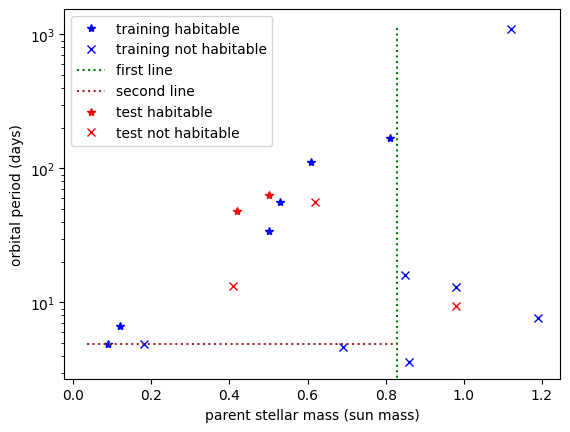

In [8]:
pattern_test_habitable \
    = np.where (y_test == 1, True, False).transpose () [0]
pattern_test_not_habitable \
    = np.where (y_test == 0, True, False).transpose () [0]
X_test_habitable = X_test [pattern_test_habitable]
X_test_not_habitable = X_test [pattern_test_not_habitable]

plt.plot (X_train_habitable [:,0], X_train_habitable [:,1], \
          'b*', label = 'training habitable')
plt.plot (X_train_not_habitable [:,0], X_train_not_habitable [:,1], \
          'bx', label = 'training not habitable')
ymin, ymax = plt.ylim ()
plt.vlines (0.83, ymin, ymax, color = 'green', \
            linestyles = 'dotted', label = 'first line')
xmin, xmax = plt.xlim ()
plt.hlines (4.93, xmin, 0.83, color = 'brown', \
            linestyles = 'dotted', label = 'second line')
plt.plot (X_test_habitable [:,0], X_test_habitable [:,1], \
          'r*', label = 'test habitable')
plt.plot (X_test_not_habitable [:,0], X_test_not_habitable [:,1], \
          'rx', label = 'test not habitable')
plt.xlabel ('parent stellar mass (sun mass)')
plt.ylabel ('orbital period (days)')
plt.yscale ("log")
plt.legend ()
plt.show ()

Von den fünf Testdaten  sind drei richtig klassifiziert, zwei jedoch nicht!

### Decision Tree (DT) mit *scikit-learn*
Die Berechnung per Hand kann sehr schnell aufwändig werden. Zudem ist die Dimension der Daten nicht nur 2. 
Bereits im obigen Beispiel wurde eine Dimension reduziert, damit die Daten grafisch anschaulich dargestellt werden können.
Das Paket *sklearn* (*scikit-learn*) bietet jedoch ein entsprechendes Modell.

Hinweis: Es werden einige zufällige Permutation bei jedem Splitt durchgeführt. Daher wird die Ergebnisse je nach Durchführung variieren.
Daher wird für den Zufallsgenerator einen *seed* definieren, um die Ergebnisse reproduzierbar zu machen.

In [9]:
# --- import 
from sklearn.tree import DecisionTreeClassifier

# --- redefine the training set und test set, use all three features
training_set = learning_set [:13,:]
test_set = learning_set [13:,:]

# --- split in features and label
X_train = training_set [:, :3]
y_train = training_set [:, 3]
X_test = test_set [:, :3]
y_test = test_set [:, 3]

# --- define the model and some parameters
DT_model = DecisionTreeClassifier(random_state = 2024) 
DT_model

DecisionTreeClassifier(random_state=2024)

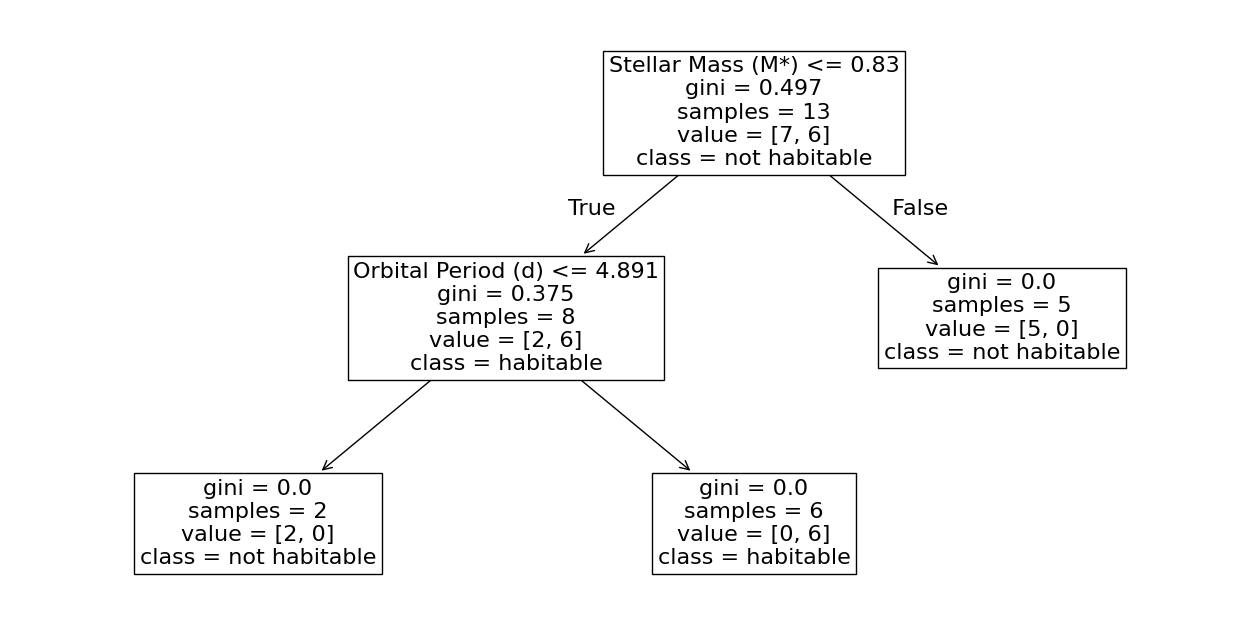

In [10]:
# --- train the model
DT_model.fit (X_train, y_train) 

# --- visualize decision tree
from sklearn import tree
# - customize according to the size of the tree
plt.figure (figsize=(16,8))  
tree.plot_tree (DT_model, feature_names = ['Stellar Mass (M*)', \
    'Orbital Period (d)', 'Distance (AU)'], \
    class_names = ['not habitable','habitable'], fontsize = 16)
plt.show()

Es ist ein sehr kleiner, kompakter Entscheidungsbaum. Mit nur zwei Entscheidungen wurde die Trainingsmenge in reine Bereiche aufgeteilt.
Die dritte Eigenschaft (`P_DISTANCE`) ist für die Entscheidungsfindung nicht verwendet worden.
Diese Eigenschaft ist somit hier unbedeutend.

Welches Ergebnis ergibt sich für die Testmenge? 
Auf jeden Fall ist gemäß diesem Entscheidungsbaum die Erde voraussichtlich nicht bewohnbar!
Als Maß wie die Genauigkeit (*accuracy*) berechnet. 
Das ist der Anteil der Instanzen, die korrekt klassifiziert wurden.

In [11]:
def calculate_accuracy (title, y_pred, y_test):
    y_diff = np.absolute (y_pred - y_test)
    n = y_diff.size
    n_correct = n - np.count_nonzero (y_diff)
    print (f"accuray {title:20s}  ", end = "")
    print (f" {n_correct} of {n} are correctly predicted,", end = "")
    print (f" {n_correct * 100.0 / n:5.1f} %")

In [12]:
# --- predict
y_pred = DT_model.predict (X_test)
calculate_accuracy ("test set", y_pred, y_test)

accuray test set               3 of 5 are correctly predicted,  60.0 %


### Abhängigkeit von der Trainingsmenge
Das gegebene Beispiel ist sehr klein. Die Lernmenge umfasst nur 18 Elemente. Davon wurden (die ersten) 13 Elemente als Trainingsmenge ausgewählt.
Jetzt werden die letzten 13 Elemente als Trainingsmenge ausgewählt.  Wie verändert sich dadurch der Entscheidungsbaum.

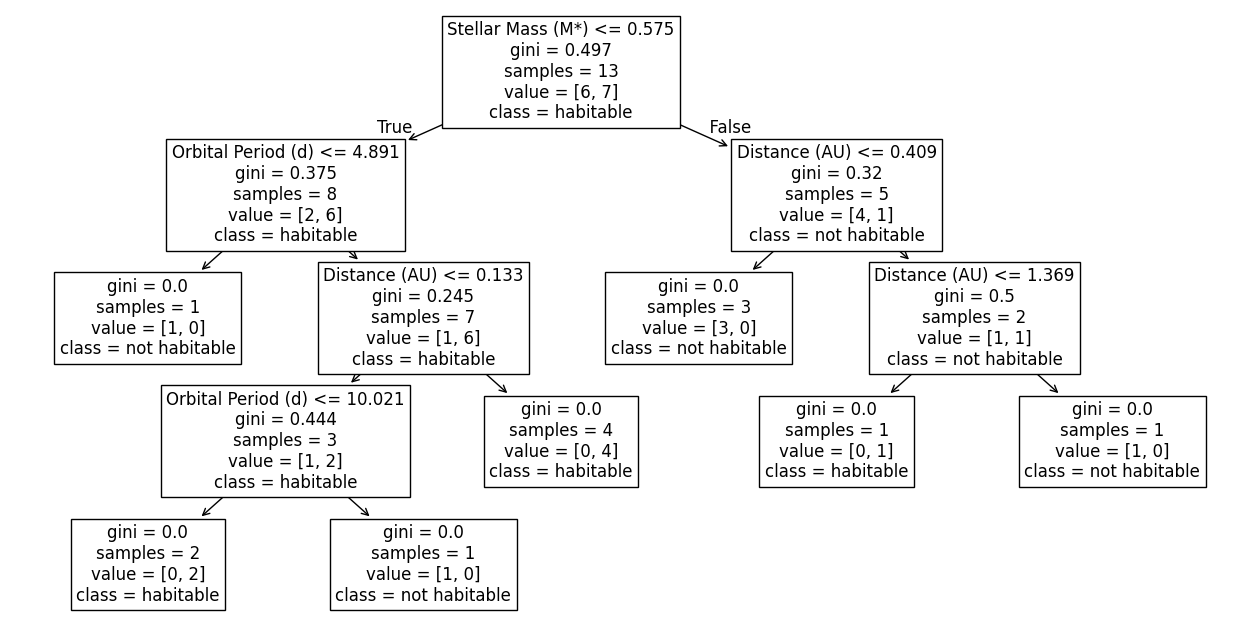

In [13]:
# --- define training set and test set
training_set2 = learning_set [5:,:]
test_set2 = learning_set [:5,:]

# --- split in features and label
X_train2 = training_set2 [:, :3]
y_train2 = training_set2 [:, 3] 
X_test2 = test_set2 [:, :3]
y_test2 = test_set2 [:, 3] 

# --- train the model
DT2_model = DecisionTreeClassifier(random_state = 2024)
DT2_model.fit (X_train2, y_train2) 

# --- visualize decision tree
from sklearn import tree
plt.figure (figsize=(16,8))
tree.plot_tree (DT2_model, feature_names = ['Stellar Mass (M*)', \
    'Orbital Period (d)', 'Distance (AU)'], \
    class_names = ['not habitable','habitable'], fontsize = 12)
plt.show()

Der Entscheidungsbaum sieht komplett anders aus. Er ist tiefer und hat somit mehr Entscheidungen.
Hier sind alle drei Eigenschaften im Entscheidungsbaum enthalten.
Welches Ergebnis ergibt sich für die Testmenge?
Auf jeden Fall ist gemäß diesem Entscheidungsbaum die Erde voraussichtlich bewohnbar!

In [14]:
# --- predict
y_pred2 = DT2_model.predict(X_test2)
calculate_accuracy ("test set", y_pred2, y_test2)

accuray test set               5 of 5 are correctly predicted, 100.0 %


Es ergibt sich hier eine 100%-tige Korrektheit. 
Doch ist damit dieser Entscheidungsbaum besser?
Das kann hier nicht einfach gesagt werden. Die Trainings- und Testmenge sind sehr klein. 
Daher kann als wichtige Aussage mitgenommen werden: **die unterschiedliche Aufteilung in Traingsmenge und Testmenge, 
kann einen entscheidenen Einfluss auf das Modell und auf den Testfehler haben**.

Die Bewertung von Modellen muss genauer betrachtet werden.
Die (einheitliche) Bewertung ist wichtig, um dann verschiedene Modelle miteinander vergleichen zu können.

### Variation des Modells: maximale Tiefe 2
Das Modell DT hat einige Parameter, die eingestellt werden können. 
Zwei Parameter (*criterion* und *splitter*) sind mit den Standardwerten definiert.
Daher sind diese Parameter oben nicht aufgetaucht. 
Weitere Möglichkeiten können in der Dokumentation für das Modell nachgesehen werden.
Ein dritter Parameter (*max_depth*) gibt an, bis zu welcher Tiefe der Entscheidungsbaum gebildet werden soll.
Im Nachfolgenden wird ein Entscheidungsbaum mit einer maximalen Tiefe von 2 erstellt und angewendet.

Als Trainings- und Testdaten wird die selbe Aufteilung wie beim zweiten Modell verwendet.

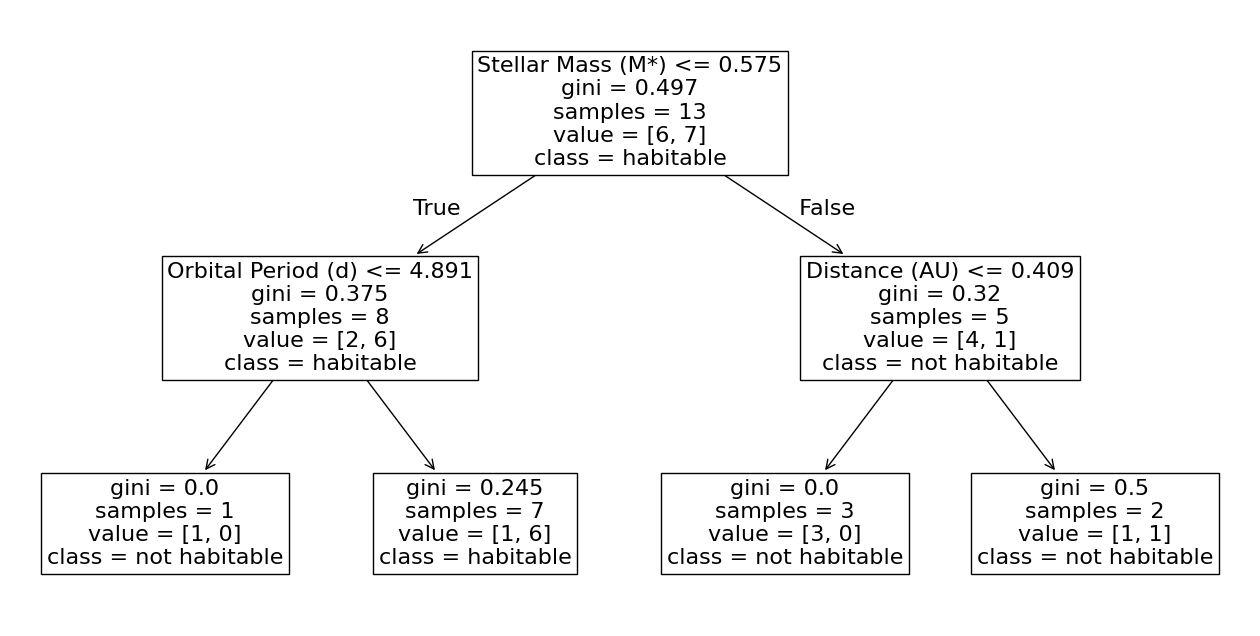

accuray test set               4 of 5 are correctly predicted,  80.0 %


In [15]:
# --- define the model and some parameters
DT3_model = DecisionTreeClassifier(criterion='gini', splitter='best', \
                                   max_depth = 2, random_state = 2024)

# --- train the model
DT3_model.fit (X_train2, y_train2) 

# --- visualize decision tree
plt.figure (figsize=(16,8))  
tree.plot_tree (DT3_model, feature_names = ['Stellar Mass (M*)', \
    'Orbital Period (d)', 'Distance (AU)'], \
    class_names = ['not habitable','habitable'], fontsize = 16)
plt.show()

# --- predict
y_pred3 = DT3_model.predict (X_test2)
calculate_accuracy ("test set", y_pred3, y_test2)

Dieses Mal 4 von 5 Testdaten korrekt. 
Die Bereiche am Ende sind nicht rein, es gibt Vermischungen.
Der Entscheidungsbaum ist nicht vollständig, sondern mit der Tiefe 2 abgebrochen.
Die Erde ist aber voraussichtlich wieder nicht bewohnbar!

### Speichern der Modelle
Die drei erstellten Modelle sollen später, wenn die Bewertung genauer besprochen werden, nochmals verwendet.
Es sollen die drei Modelle auf die gesamte Menge der Exoplaneten angewendet werden, 
also nicht nur auf die 18 ausgewählten Planeten.

Das Maschinelle Lernen hat zwei wichtige Phasen:
- Beim Training soll ein möglichst gutes Modell gefunden werden. 
In diese Phase wird daher viel Zeit investiert.
Sowohl Denkzeit (Modell oder Parameter vom Modell ändern) als auch Rechenzeit (das veränderte Modell durchrechnen).
- Beim Anwenden soll das trainierte Modell möglichst schnell ein Ergebnis liefern. 
Es kann nicht erst bei der Anwendung trainiert werden. 
Wenn im LHC Proton-Proton-Kollisionen durchgeführt werden, dann entstehen in jeder Sekunde Millionen von Ereignissen.
Diese müssen schnell dahingehend selektiert werden, ob eventuell ein interessantes Ereignis dabei ist.

Daher ist es notwendig, ein gerlerntes Modell zu speichern, um es später wieder zu laden.

In [16]:
import pickle

with open ("DT1-habitable.pkl", "wb") as f:
    pickle.dump (DT_model, f)
with open ("DT2-habitable.pkl", "wb") as f:
    pickle.dump (DT2_model, f)
with open ("DT3-habitable.pkl", "wb") as f:
    pickle.dump (DT3_model, f)

## Binäre Klassifiaktion - k-Nächster Nachbar (kNN)
Der **k Nächster Nachbar** (kNN, *k Nearest Neigbours*) Algorithmus ist ein sehr einfacher Algorithmus. 
Er wurde 1967 von Cover und Hart ([Cov1967]) vorgeschlagen. Das einfache Prinzip des Algorithmus:

Bestimme die $k$ nächsten Nachbarn des Objektes. Dabei ist $k$ eine vordefinierte feste Zahl.
Die Klasse, welche die Mehrheit in dieser Nachbarschaft hat, ist die Klasse für das Objekt.

Bei einer binären Klassifikation ist es daher sinnvoll, dass $k$ eine ungerade Zahl ist.
Ansonsten könnten die beiden Klassen die gleiche Anzahl in der Nachbarschaft haben. 
Dann müsste über einen Zufallsprozess entschieden werden, zu welcher Klasse das Objekt gehören soll.

### Daten - Habitable Planeten
Als Lernmenge dienen hier wieder die 18 Planeten, die von Acquaviva [Acq2023] ausgewählt wurden.
Als Trainingsmenge werden die ersten 13 Planeten gewählt. Die anderen fünf Planeten sind dann die Testmenge.
Die Aufteilung wurde oben bereits durchgeführt. Die Daten wurden oben bereits dargestellt.

### Modell wählen und anwenden
Als Modell wird der k Nächster Nachbar-Klassifizierer gewählt. 
Hierzu werden für ein neues Objekt die $k$ Elemente in der Trainingsmenge gesucht, die am nächsten sind.
Als Abstandsmaß ist standardmäßig der euklidsche Abstand im $d$-dimensionalen Raum $\mathbb{R}^d$ gewählt,
wenn $d$ die Anzahl der Input-Daten je Instanz ist.

Für die Bestimmung der Nachbarschaft werden 3 Nachbarn gewählt,
da die Traingsmenge nur klein ist. Der Standardwert ist 5.

In [17]:
from sklearn import neighbors
model_kNN = neighbors.KNeighborsClassifier(n_neighbors = 3)
model_kNN

KNeighborsClassifier(n_neighbors=3)

Nun kann das Training durchgeführt werden.
Dabei ist das Training sehr kurz, denn die Hauptarbeit wird erst bei der Vorhersage getätigt,
wenn die $k$ nächsten Nachbarn gesucht werden. 

In [18]:
# --- train the model
model_kNN.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Nun werden die Vorhersagen für die Testmenge durchgeführt.
Danach wird untersucht, wie viele Vorhersagen korrekt sind.
Ergänzend wird auch untersucht, wie viele Elemente der Trainingsmenge korrekt vorhergesagt werden.

In [19]:
# --- predict the test set
model_kNN.predict (X_test)

y_pred = model_kNN.predict (X_test)
calculate_accuracy ("test set", y_pred, y_test)

# --- check the training set
y_pred_training = model_kNN.predict (X_train)
calculate_accuracy ("training set", y_pred_training, y_train)

accuray test set               4 of 5 are correctly predicted,  80.0 %
accuray training set           9 of 13 are correctly predicted,  69.2 %


Anmerkungen:
- Die Datenmenge ist klein. Trotzdem hat das Training weniger Zeit gekostet als die Vorhersagen.
Das liegt daran, dass die eigentliche Arbeit erst bei der Vorhersage durchgeführt wird,
wenn die Nachbarn konkret gesucht werden.
- Auch hier sind wieder 4 von 5 Vorhersagen korrekt. 
Aber auch das ist wieder durch die kleine Datenmenge bedingt.
- Die Genauigkeit in der Trainingsmenge ist nur etwa 70%, also nicht gut.

Die ausgewählten benachbarten Planeten und die Abstände dazu können ausgegeben werden.

In [20]:
distances, index_planets = model_kNN.kneighbors(X_test) 
# the first element gives the distances, 
# the second the index of each neighbor
print (distances)
print (index_planets)

[[ 0.26723611 21.66437677 39.72625831]
 [ 0.67441775  2.76407656  5.76654045]
 [ 7.28037162 29.19430084 47.25714574]
 [ 1.80794431  2.87719844  3.55797489]
 [ 7.9224022  13.99262918 32.05681617]]
[[11 10  1]
 [ 4  1  2]
 [11 10  1]
 [ 2  7  4]
 [11 10  1]]


Da nur zwei der drei Eigenschaften gewählt wurden, können die Daten visualisiert werden. 
Die Implementierung wird (leicht modifiziert) von Acquaviva [Acq2023] übernommen.

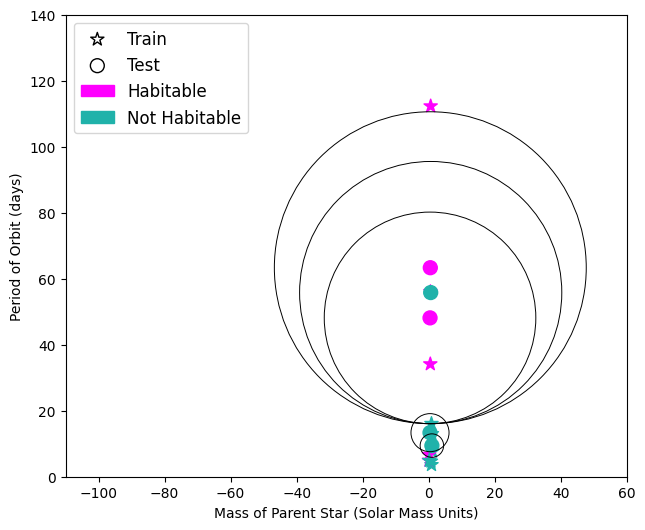

In [21]:
def visualize_neighbours (X_train, X_test, y_train, y_test, \
                          model, k, xlim, ylim):
    plt.figure(figsize=(10,6))
    C_HAB = '#20B2AA' # color habitable
    C_NOT = '#FF00FF' # color non habitable
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list \
        ("", [C_HAB, C_NOT])

    # --- training set
    a = plt.scatter(X_train [:,0], X_train [:,1], marker = '*',facecolor = 'none',\
            c = y_train, s = 100, label = 'Train', cmap=cmap) 

    # --- test set
    a = plt.scatter(X_test [:,0], X_test [:,1], marker = 'o',facecolors = 'none',\
            c = y_test, s = 100, label = 'Test', cmap=cmap) 

    # --- circles around the test data with max distance of the k neigbours
    for i in range (len(X_test)): #plot neighbors
        distance  = model.kneighbors (X_test) [0] [i, k-1]
        circle1 = plt.Circle ((X_test [i,0], X_test [i,1]), distance, \
                       lw = 0.7, edgecolor='k', facecolor='none')
        plt.gca ().add_artist (circle1)
    
    plt.gca().set_aspect(1)

    bluepatch = mpatches.Patch(color=C_HAB, label='Not Habitable')
    magentapatch = mpatches.Patch(color=C_NOT, label='Habitable')

    plt.legend();

    ax = plt.gca()
    leg = ax.get_legend()
    leg.legend_handles[0].set_color('k')
    leg.legend_handles[0].set_facecolor('none')
    leg.legend_handles[1].set_color('k')
    leg.legend_handles[1].set_facecolor('none')

    plt.legend (handles=[leg.legend_handles[0],leg.legend_handles[1], \
                         magentapatch, bluepatch],\
           loc = 'upper left', fontsize = 12)

    plt.xlim (xlim)
    plt.ylim (ylim)
    plt.xlabel('Mass of Parent Star (Solar Mass Units)')
    plt.ylabel('Period of Orbit (days)');

visualize_neighbours (X_train, X_test, y_train, y_test, model_kNN, 3, \
                      [-110, 60], [0, 140])

In dieser Abbildung sind die Planeten (ohne den Ausreißer HD 68402 b) eingezeichnet. 
Um die Planeten der Testmenge ist jeweils ein Kreis mit dem Radius zum Planeten in der Trainingsmenge mit der drittkürzesten Entfernung gezeichnet.

Hier ist deutlich zu sehen, dass die Eigenschaft Masse des Elternsterns unbedeutend gegenüber der Eigenschaft Periodendauer ist.
Das liegt daran, dass die numerischen Werte der Periodendauer deutlich höher sind als die numerischen Werte der Sternmasse.
Da die Distanz zwischen Planeten als Euklidsche Entfernung berechnet wird, ist es sehr entscheidend, wenn die Bereiche deutlich unterschiedlich sind.

Es werden nun statitsischen Kennzehlen der Trainingsdaten ermittelt.

In [22]:
def analyse_data (x, title):
    print (title)
    print (f"  min    : {np.min (x):7.2f}   max : {np.max (x):7.2f} ")
    print (f"  mean   : {np.mean (x):7.2f}   std : {np.std (x):7.2f} ")
    q3, q1 = np.percentile(x, [75 ,25])
    iqr = q3 - q1
    print (f"  median : {np.median (x):7.2f}   IQR : {iqr:7.2f}")

analyse_data (X_train [:,0], "feature: Parent Star Mass")
print ()
analyse_data (X_train [:,1], "feature: Period of Orbit")

feature: Parent Star Mass
  min    :    0.09   max :    1.19 
  mean   :    0.66   std :    0.35 
  median :    0.69   IQR :    0.36

feature: Period of Orbit
  min    :    3.60   max : 1103.00 
  mean   :  118.13   std :  288.39 
  median :   12.99   IQR :   51.15


Da kNN die Abstände berechnet ist es wichtig, dass die einzelnen Achsen (Dimension) die selbe Skalierung haben. 
Somit wird jede Eigenschaft normalisiert.

Eine typische Wahl kann sein, dass der Mittelwert (*mean*) bei $0$ ist 
und die Standardabweichung (*standard deviation*) bei $1$.
Das obige Beispiel zeigt jedoch eine Problematik.
Mittelwert und Standardabweichung sind anfällig gegenüber Ausreißer. Der Planet HD 68402 b ist mit der Periodenlänge von 1103 Tagen ein Ausreißer.

Robuster gegenüber Ausreißern ist der Median (*median*) und der Interquartilsabstand (IQR, *interquartile range* ), 
also der Abstand zwischen dem 75%-Wert und dem 25%-Wert der Daten.
Die Transformation ist dann so, dass der Median bei $0$ ist und $IQR = 2$.

Die Normalisierung wird aus den Trainingsdaten berechnet und dann die selbe Transformation auf die Testdaten angewendet. 
Die Normalisierung auf alle Daten würde die Trainingsdaten verzerren, da die Testdaten bei der Berechnung von Mittelwert oder Abweichung einen Einfluss haben.

Scikit-learn, bietet dafür entsprechende Routinen an.

### Normalisierung nach Mittelwert und Standardabweichung

accuray test set               3 of 5 are correctly predicted,  60.0 %


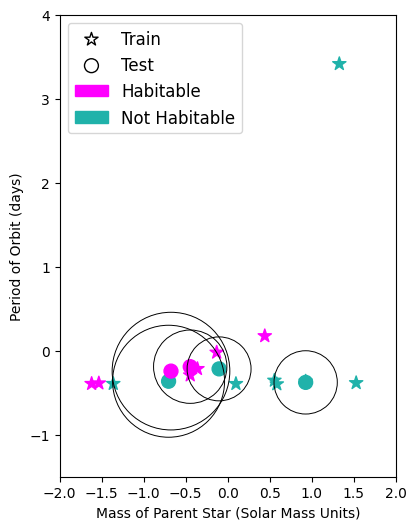

In [23]:
import sklearn

scaler = sklearn.preprocessing.StandardScaler ()
scaler.fit (X_train)
scaled_X_train = scaler.transform (X_train)
scaled_X_test = scaler.transform (X_test)

model_kNN.fit (scaled_X_train, y_train)
y_pred = model_kNN.predict (scaled_X_test)
calculate_accuracy ("test set", y_pred, y_test)

visualize_neighbours (scaled_X_train, scaled_X_test, y_train, y_test, \
                      model_kNN, 3, [-2, 2], [-1.5, 4])

Der Ausreißer, der rechts oben dargestellt ist, verzerrt die Bearbeitung.

### Normalisierung nach Median und Interquartilsabstand

accuray test set               4 of 5 are correctly predicted,  80.0 %


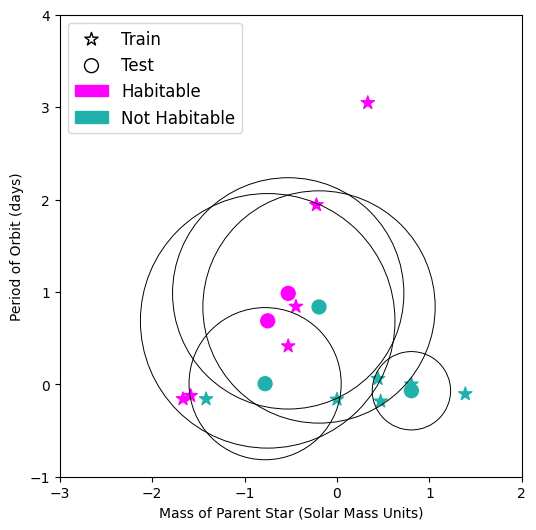

In [24]:
scaler = sklearn.preprocessing.RobustScaler ()
scaler.fit (X_train)
scaled_X_train = scaler.transform (X_train)
scaled_X_test = scaler.transform (X_test)

model_kNN.fit (scaled_X_train, y_train)
y_pred = model_kNN.predict (scaled_X_test)

calculate_accuracy ("test set", y_pred, y_test)

visualize_neighbours (scaled_X_train, scaled_X_test, y_train, y_test, \
                      model_kNN, 3, [-3, 2], [-1, 4])

Hier ist die Darstellung weniger verzerrt. 
Der Ausreißer ist hier außerhalb der Zeichenfläche.

### Algorithmus auf alle drei Eigenschaften anwenden
In den obigen Ausführungen wurden nur zwei Eigenschaften berücksichtigt,
damit die Daten grafisch dargestellt werden können.
Nun wird auch die dritte Eigenschaft herangezogen.
Damit repräsentieren die Planeten einen Punkt in einem 3-dimensionalen Raum.
Die Daten werden robust normiert, damit Ausreißer die Ergebnisse nicht verzerren.
Da die Abstände zwischen den Datenpunkten berechnet wird,
ist jede der Eigenschaften gleich bedeutend.

Es wird auch die Genauigkeit für die Traiingsmenge berechnet

In [25]:
# --- split into training set / test set
training_set = learning_set [:13,:]
test_set = learning_set [13:,:]

# --- split in features and label
X_train = training_set [:, :3]
y_train = training_set [:, 3]
X_test = test_set [:, :3]
y_test = test_set [:, 3]

# --- scaling
scaler.fit (X_train)
scaled_X_train = scaler.transform (X_train)
scaled_X_test = scaler.transform (X_test)

# --- fit
model_kNN.fit (scaled_X_train, y_train)

# --- predict
y_pred = model_kNN.predict (scaled_X_test)
y_pred_train = model_kNN.predict (scaled_X_train)

calculate_accuracy ("test set", y_pred, y_test)
calculate_accuracy ("training set", y_pred_train, y_train)

accuray test set               4 of 5 are correctly predicted,  80.0 %
accuray training set           11 of 13 are correctly predicted,  84.6 %


## Literatur
- [Acq2023] Viviana Acquaviva; Machine Learning for Physics and Astronomy; Princeton University Press; 2023
- [Cov1967] T. M. Cover, P. E. Hart; Nearest Neigbor Pattern Classification; IEEE Transactions on Information Theory 13 (1967) 21 - 27